<a href="https://colab.research.google.com/github/MO-13/MECH-314-01/blob/master/MA_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
#MOHSIN AHMED
#Data-Driven Problem Solving in ME (Fall 2020, Masoumi)
# Midterm Project

# Import DataSet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mount google drive for accessing files
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
file_path = '/content/drive/My Drive/Big Data (Masoumi) MECG 542'
df = pd.read_csv(file_path+'/OceanicData.csv')
# Dataset is now stored in a Pandas's Dataframe
df.head()

,Unnamed: 0,Station_Name,Owner,Latitude,Longitude,Wind Dir.,Wind speed,Wave Height,Dom Wave Period,Ave Wave Period,Wave Dir.,Sea Level Pressure,Air Temp.,Sea Surface Temp.,Dewpoint Temp.,Station Visib.,Water Level,Energy Flux,Wave Height Cat,Wave Period Cat
0,0,44005,Shell Oil Stations,-69.128,43.204,194.934726,5.7799155326138045,1.3601703084832888,7.705,5.288071979434465,161.282,1016.041,9.710,11.016,11.471,NaN,NaN,4790.355456,Tall,Long
1,1,44095,Shell Oil Stations,-75.330,35.750,NaN,NaN,1.3402403150153408,8.322,5.550170826336227,102.439,NaN,NaN,18.003,NaN,NaN,NaN,4881.524881,Tall,Long
2,2,42020,Shell Oil Stations,-96.694,26.968,135.860369,6.4575387044596395,1.2808008356546017,6.563,4.851848885793895,111.423,1015.087,24.147,25.139,21.528,NaN,NaN,3897.214164,Tall,Average
3,3,41044,Shell Oil Stations,-58.614,21.639,100.208862,5.6717065753002895,1.7124064852345138,9.369,6.34987955993052,107.313,1018.619,26.441,27.263,21.352,NaN,NaN,9117.232241,Very Tall,Long
4,4,46053,Shell Oil Stations,-119.841,34.248,222.279682,4.491136315495583,1.1334796710297683,10.070,5.965806787906875,253.150,1015.245,15.322,15.757,12.949,NaN,NaN,3753.016352,Tall,Long


# Data Cleaning & Handling Missing Data

In [195]:
# Data Cleaning & Handling Missing Data

# Drop columns with No Values and first Unnecessary co
df.drop(columns='Station Visib.',inplace=True)
df.drop(columns='Water Level',inplace=True)
df.head()
missing_data=df.isnull()
for column in missing_data.columns.to_list():
    print(column)
    print (missing_data[column].value_counts())
    print("")

print ("There are 6 Columns with missing values")

Unnamed: 0
False    134
Name: Unnamed: 0, dtype: int64

Station_Name
False    134
Name: Station_Name, dtype: int64

Owner
False    134
Name: Owner, dtype: int64

Latitude
False    134
Name: Latitude, dtype: int64

Longitude
False    134
Name: Longitude, dtype: int64

Wind Dir.
False    72
True     62
Name: Wind Dir., dtype: int64

Wind speed
False    73
True     61
Name: Wind speed, dtype: int64

Wave Height
False    134
Name: Wave Height, dtype: int64

Dom Wave Period
False    134
Name: Dom Wave Period, dtype: int64

Ave Wave Period
False    134
Name: Ave Wave Period, dtype: int64

Wave Dir.
False    134
Name: Wave Dir., dtype: int64

Sea Level Pressure
False    72
True     62
Name: Sea Level Pressure, dtype: int64

Air Temp.
False    72
True     62
Name: Air Temp., dtype: int64

Sea Surface Temp.
False    132
True       2
Name: Sea Surface Temp., dtype: int64

Dewpoint Temp.
True     74
False    60
Name: Dewpoint Temp., dtype: int64

Energy Flux
False    134
Name: Energy Flux, dtype:

In [196]:
# For 6 Columns with missing values
df[df['Wind Dir.'].isnull()]
df[df['Dewpoint Temp.'].isnull()]
df[df['Sea Surface Temp.'].isnull()]
df[df['Air Temp.'].isnull()]
df[df['Sea Level Pressure'].isnull()]
df[df['Wind speed'].isnull()]

,Unnamed: 0,Station_Name,Owner,Latitude,Longitude,Wind Dir.,Wind speed,Wave Height,Dom Wave Period,Ave Wave Period,Wave Dir.,Sea Level Pressure,Air Temp.,Sea Surface Temp.,Dewpoint Temp.,Energy Flux,Wave Height Cat,Wave Period Cat
1,1,44095,Shell Oil Stations,-75.330,35.750,NaN,NaN,1.3402403150153408,8.322,5.550170826336227,102.439,NaN,NaN,18.003,NaN,4881.524881,Tall,Long
7,7,51210,Shell Oil Stations,-157.756,21.477,NaN,NaN,1.6658630569524,9.179,6.401333177406148,101.878,NaN,NaN,25.892,NaN,8698.268874,Very Tall,Long
9,9,44099,Shell Oil Stations,-75.720,36.901,NaN,NaN,1.0126025694156642,8.188,4.997139798314688,109.822,NaN,NaN,18.394,NaN,2508.899998,Tall,Average
13,13,46108,Shell Oil Stations,-151.817,59.590,NaN,NaN,0.6306463533225273,5.110,3.7324330632090734,244.517,NaN,NaN,8.303,NaN,726.854707,Average Height,Average
14,14,46256,Shell Oil Stations,-118.201,33.700,NaN,NaN,0.8582727537074734,14.236,7.972836289619107,212.176,NaN,NaN,16.983,NaN,2875.724650,Average Height,Very Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,46239,Shell Oil Stations,-122.101,36.338,NaN,NaN,2.089128105211893,11.979,7.688311182242027,281.576,NaN,NaN,14.011,NaN,16430.277486,Very Tall,Very Long
119,119,51211,Shell Oil Stations,-157.959,21.297,NaN,NaN,-,10.500,5.758139975152331,156.958,NaN,NaN,26.412,NaN,1997.004355,Average Height,Long
123,123,46235,Shell Oil Stations,-117.167,32.572,NaN,NaN,0.9955982249530628,13.410,7.1799823633156965,254.114,NaN,NaN,17.202,NaN,3484.780329,Average Height,Very Long
128,128,51208,Shell Oil Stations,-159.574,22.285,NaN,NaN,1.942137274626648,10.359,6.856831231138296,170.682,NaN,NaN,24.389,NaN,12663.889405,Very Tall,Long


In [197]:
# drop those rows with missing values and re-evaluate columns
df.dropna(axis=0, how='any', inplace=True) #subset=['Wind Dir.','Sea Surface Temp.','Air Temp.','Sea Level Pressure','Wind speed','Dewpoint Temp.'],inplace=True)

missing_data=df.isnull()
for column in missing_data.columns.to_list():
    print(column)
    print (missing_data[column].value_counts())
    print("")



Unnamed: 0
False    59
Name: Unnamed: 0, dtype: int64

Station_Name
False    59
Name: Station_Name, dtype: int64

Owner
False    59
Name: Owner, dtype: int64

Latitude
False    59
Name: Latitude, dtype: int64

Longitude
False    59
Name: Longitude, dtype: int64

Wind Dir.
False    59
Name: Wind Dir., dtype: int64

Wind speed
False    59
Name: Wind speed, dtype: int64

Wave Height
False    59
Name: Wave Height, dtype: int64

Dom Wave Period
False    59
Name: Dom Wave Period, dtype: int64

Ave Wave Period
False    59
Name: Ave Wave Period, dtype: int64

Wave Dir.
False    59
Name: Wave Dir., dtype: int64

Sea Level Pressure
False    59
Name: Sea Level Pressure, dtype: int64

Air Temp.
False    59
Name: Air Temp., dtype: int64

Sea Surface Temp.
False    59
Name: Sea Surface Temp., dtype: int64

Dewpoint Temp.
False    59
Name: Dewpoint Temp., dtype: int64

Energy Flux
False    59
Name: Energy Flux, dtype: int64

Wave Height Cat
False    59
Name: Wave Height Cat, dtype: int64

Wave Period

In [198]:
df.info() #tells everything about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 133
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          59 non-null     int64  
 1   Station_Name        59 non-null     int64  
 2   Owner               59 non-null     object 
 3   Latitude            59 non-null     float64
 4   Longitude           59 non-null     float64
 5   Wind Dir.           59 non-null     float64
 6   Wind speed          59 non-null     object 
 7   Wave Height         59 non-null     object 
 8   Dom Wave Period     59 non-null     float64
 9   Ave Wave Period     59 non-null     object 
 10  Wave Dir.           59 non-null     float64
 11  Sea Level Pressure  59 non-null     float64
 12  Air Temp.           59 non-null     float64
 13  Sea Surface Temp.   59 non-null     float64
 14  Dewpoint Temp.      59 non-null     float64
 15  Energy Flux         59 non-null     float64
 16  Wave Heig

In [199]:
df[df.isnull().any(axis=1)] #show rows with missing values

#'There are no rows with missing values')


,Unnamed: 0,Station_Name,Owner,Latitude,Longitude,Wind Dir.,Wind speed,Wave Height,Dom Wave Period,Ave Wave Period,Wave Dir.,Sea Level Pressure,Air Temp.,Sea Surface Temp.,Dewpoint Temp.,Energy Flux,Wave Height Cat,Wave Period Cat


In [200]:
#Check for any more Nan values
print(df.isnull().sum().sum(),'There are no more NaN values')
df.shape #check the size of the data frame
print('There are 59 rows and 18 columns')

0 There are no more NaN values
There are 59 rows and 18 columns


In [201]:
#check the data types for all the columns
df.dtypes

Unnamed: 0              int64
Station_Name            int64
Owner                  object
Latitude              float64
Longitude             float64
Wind Dir.             float64
Wind speed             object
Wave Height            object
Dom Wave Period       float64
Ave Wave Period        object
Wave Dir.             float64
Sea Level Pressure    float64
Air Temp.             float64
Sea Surface Temp.     float64
Dewpoint Temp.        float64
Energy Flux           float64
Wave Height Cat        object
Wave Period Cat        object
dtype: object

In [202]:
# Change data type of columns to aproppriate ones

df['Wind speed']=df['Latitude'].astype('float32')
df['Wave Height']=df['Wave Height'].astype('float32')
df['Ave Wave Period']=df['Ave Wave Period'].astype('float64')
df['Station_Name']=df['Station_Name'].astype('object')
df.head()

,Unnamed: 0,Station_Name,Owner,Latitude,Longitude,Wind Dir.,Wind speed,Wave Height,Dom Wave Period,Ave Wave Period,Wave Dir.,Sea Level Pressure,Air Temp.,Sea Surface Temp.,Dewpoint Temp.,Energy Flux,Wave Height Cat,Wave Period Cat
0,0,44005,Shell Oil Stations,-69.128,43.204,194.934726,-69.127998,1.360170,7.705,5.288072,161.282,1016.041,9.710,11.016,11.471,4790.355456,Tall,Long
2,2,42020,Shell Oil Stations,-96.694,26.968,135.860369,-96.694000,1.280801,6.563,4.851849,111.423,1015.087,24.147,25.139,21.528,3897.214164,Tall,Average
3,3,41044,Shell Oil Stations,-58.614,21.639,100.208862,-58.613998,1.712407,9.369,6.349880,107.313,1018.619,26.441,27.263,21.352,9117.232241,Very Tall,Long
4,4,46053,Shell Oil Stations,-119.841,34.248,222.279682,-119.841003,1.133480,10.070,5.965807,253.150,1015.245,15.322,15.757,12.949,3753.016352,Tall,Long
5,5,46025,Shell Oil Stations,-119.053,33.749,224.979949,-119.053001,1.081138,12.421,6.313183,217.177,1014.969,16.306,16.991,14.255,3613.217032,Tall,Long


In [203]:
# round to reduce decimal points
df.round({'Wind Dir.': 2, 'Wave Height': 3,'Ave Wave Period':3,'Wave Dir.': 2,'Air Temp.':2,'Energy Flux':2}) 

,Unnamed: 0,Station_Name,Owner,Latitude,Longitude,Wind Dir.,Wind speed,Wave Height,Dom Wave Period,Ave Wave Period,Wave Dir.,Sea Level Pressure,Air Temp.,Sea Surface Temp.,Dewpoint Temp.,Energy Flux,Wave Height Cat,Wave Period Cat
0,0,44005,Shell Oil Stations,-69.128,43.204,194.93,-69.127998,1.360,7.705,5.288,161.28,1016.041,9.71,11.016,11.471,4790.36,Tall,Long
2,2,42020,Shell Oil Stations,-96.694,26.968,135.86,-96.694000,1.281,6.563,4.852,111.42,1015.087,24.15,25.139,21.528,3897.21,Tall,Average
3,3,41044,Shell Oil Stations,-58.614,21.639,100.21,-58.613998,1.712,9.369,6.350,107.31,1018.619,26.44,27.263,21.352,9117.23,Very Tall,Long
4,4,46053,Shell Oil Stations,-119.841,34.248,222.28,-119.841003,1.133,10.070,5.966,253.15,1015.245,15.32,15.757,12.949,3753.02,Tall,Long
5,5,46025,Shell Oil Stations,-119.053,33.749,224.98,-119.053001,1.081,12.421,6.313,217.18,1014.969,16.31,16.991,14.255,3613.22,Tall,Long
6,6,42059,Shell Oil Stations,-67.472,15.054,101.69,-67.472000,1.402,7.104,5.114,98.25,1013.761,28.42,28.786,24.541,4919.26,Tall,Long
8,8,46047,Shell Oil Stations,-119.536,32.403,285.25,-119.536003,2.049,12.172,7.354,277.11,1014.856,16.07,17.013,13.906,15113.69,Very Tall,Very Long
10,10,46069,Shell Oil Stations,-120.200,33.670,281.72,-120.199997,2.018,12.116,7.134,275.77,1015.121,15.23,15.999,14.169,14219.16,Very Tall,Very Long
11,11,46081,Shell Oil Stations,-148.263,60.803,142.34,-148.263000,0.158,3.125,2.786,113.82,1012.816,7.61,9.162,5.285,34.11,Low Height,Short
12,12,46029,Shell Oil Stations,-124.514,46.159,199.66,-124.514000,2.112,11.509,7.049,277.66,1017.148,11.78,12.642,8.763,15400.56,Very Tall,Very Long


In [204]:
#rename columns to include units and cleaner names
df.rename(columns={'Owner':'Station Owner','Wind Dir.':'Wind Direction','Wind speed':'Wind Speed (m/s)'}, inplace=True)
df.rename(columns={'Wave Height':'Wave Height (m)','Dom Wave Period':'Dominant Wave Period (s)','Ave Wave Period':'Average Wave Period (s)'}, inplace=True)
df.rename(columns={'Sea Level Pressure':'Sea Level Pressure (hPa)','Air Temp.':'Air Temperature (C)','Sea Surface Temp.':'Sea Surface Temperature (C)','Dewpoint Temp.':'Dewpoint Temperature (C)'}, inplace=True)
df.rename(columns={'Energy Flux':'Energy Flux (kW/m)'}, inplace=True)
df.drop(columns='Unnamed: 0',inplace=True) #drop Number Column, unnecessary 
df.head()



,Station_Name,Station Owner,Latitude,Longitude,Wind Direction,Wind Speed (m/s),Wave Height (m),Dominant Wave Period (s),Average Wave Period (s),Wave Dir.,Sea Level Pressure (hPa),Air Temperature (C),Sea Surface Temperature (C),Dewpoint Temperature (C),Energy Flux (kW/m),Wave Height Cat,Wave Period Cat
0,44005,Shell Oil Stations,-69.128,43.204,194.934726,-69.127998,1.360170,7.705,5.288072,161.282,1016.041,9.710,11.016,11.471,4790.355456,Tall,Long
2,42020,Shell Oil Stations,-96.694,26.968,135.860369,-96.694000,1.280801,6.563,4.851849,111.423,1015.087,24.147,25.139,21.528,3897.214164,Tall,Average
3,41044,Shell Oil Stations,-58.614,21.639,100.208862,-58.613998,1.712407,9.369,6.349880,107.313,1018.619,26.441,27.263,21.352,9117.232241,Very Tall,Long
4,46053,Shell Oil Stations,-119.841,34.248,222.279682,-119.841003,1.133480,10.070,5.965807,253.150,1015.245,15.322,15.757,12.949,3753.016352,Tall,Long
5,46025,Shell Oil Stations,-119.053,33.749,224.979949,-119.053001,1.081138,12.421,6.313183,217.177,1014.969,16.306,16.991,14.255,3613.217032,Tall,Long


In [205]:
#SORTING
#Convert all negative values in WInd SPeed COlumn to positive
#Sort columns based on: Wave Height (m) Column from smallest to largest
df['Wind Speed (m/s)'] = df['Wind Speed (m/s)'].abs()
df.sort_values("Wave Height (m)", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
df.head()

,Station_Name,Station Owner,Latitude,Longitude,Wind Direction,Wind Speed (m/s),Wave Height (m),Dominant Wave Period (s),Average Wave Period (s),Wave Dir.,Sea Level Pressure (hPa),Air Temperature (C),Sea Surface Temperature (C),Dewpoint Temperature (C),Energy Flux (kW/m),Wave Height Cat,Wave Period Cat
11,46081,Shell Oil Stations,-148.263,60.803,142.336908,148.263000,0.158126,3.125,2.785776,113.818,1012.816,7.610,9.162,5.285,34.106411,Low Height,Short
92,46088,Shell Oil Stations,-123.165,48.334,180.782923,123.165001,0.355898,4.936,3.855564,196.219,1016.601,9.359,9.534,6.664,239.124283,Low Height,Average
21,44020,Shell Oil Stations,-70.186,41.443,200.439631,70.185997,0.488449,3.795,3.352437,184.206,1016.480,8.649,12.240,4.619,391.636719,Low Height,Average
108,42012,Shell Oil Stations,-87.551,30.064,166.391410,87.551003,0.759479,5.300,4.053411,157.239,1017.830,21.827,26.645,17.510,1144.817575,Average Height,Average
124,42035,Shell Oil Stations,-94.413,29.232,145.428071,94.413002,0.878027,5.583,4.165439,149.921,1017.126,23.298,21.474,20.730,1572.390830,Average Height,Average


In [206]:
#reset the index values since we have removed multiple lines from the data set.
df.reset_index(drop=True,inplace=True) # reset the index and drops the old index
df.head()

,Station_Name,Station Owner,Latitude,Longitude,Wind Direction,Wind Speed (m/s),Wave Height (m),Dominant Wave Period (s),Average Wave Period (s),Wave Dir.,Sea Level Pressure (hPa),Air Temperature (C),Sea Surface Temperature (C),Dewpoint Temperature (C),Energy Flux (kW/m),Wave Height Cat,Wave Period Cat
0,46081,Shell Oil Stations,-148.263,60.803,142.336908,148.263000,0.158126,3.125,2.785776,113.818,1012.816,7.610,9.162,5.285,34.106411,Low Height,Short
1,46088,Shell Oil Stations,-123.165,48.334,180.782923,123.165001,0.355898,4.936,3.855564,196.219,1016.601,9.359,9.534,6.664,239.124283,Low Height,Average
2,44020,Shell Oil Stations,-70.186,41.443,200.439631,70.185997,0.488449,3.795,3.352437,184.206,1016.480,8.649,12.240,4.619,391.636719,Low Height,Average
3,42012,Shell Oil Stations,-87.551,30.064,166.391410,87.551003,0.759479,5.300,4.053411,157.239,1017.830,21.827,26.645,17.510,1144.817575,Average Height,Average
4,42035,Shell Oil Stations,-94.413,29.232,145.428071,94.413002,0.878027,5.583,4.165439,149.921,1017.126,23.298,21.474,20.730,1572.390830,Average Height,Average


In [207]:
# download updated file to look at 
df.to_excel('OceanicDataCleaned.xlsx',sheet_name='FirstSheet')
from google.colab import files
files.download('OceanicDataCleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Descriptive Statistics

In [208]:
# Consider the basic statistics of each column
#Descriptive Statistics (summary statistics using Pandas for the whole data frame)
df.describe()

,Latitude,Longitude,Wind Direction,Wind Speed (m/s),Wave Height (m),Dominant Wave Period (s),Average Wave Period (s),Wave Dir.,Sea Level Pressure (hPa),Air Temperature (C),Sea Surface Temperature (C),Dewpoint Temperature (C),Energy Flux (kW/m)
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,-104.290458,35.502983,172.692213,104.290451,1.600231,8.895458,5.850868,174.731424,1015.499695,17.749051,18.822966,14.550847,9198.819863
std,33.430778,12.237508,51.193624,33.430775,0.591707,2.307137,1.140312,62.349021,3.076024,7.453704,7.335853,6.752679,6968.474097
min,-172.058000,14.477000,80.558108,53.007999,0.158126,3.125000,2.785776,87.406000,1005.726000,6.666000,7.690000,1.966000,34.106411
25%,-124.631000,27.508500,142.202007,74.203003,1.174522,7.253500,5.024110,126.212000,1014.330500,10.048500,11.779500,8.336500,3627.960632
50%,-94.413000,33.749000,170.894284,94.413002,1.615092,8.962000,6.076968,161.282000,1016.232000,16.895000,17.013000,14.169000,7720.827141
75%,-74.203000,42.775000,201.868121,124.630997,2.102549,10.984500,6.990167,220.728500,1017.636500,25.190000,26.494000,21.346000,15257.125395
max,-53.008000,60.803000,285.247148,172.057999,2.931028,12.776000,7.353774,289.375000,1020.108000,28.421000,29.020000,25.746000,29907.089061


In [209]:
# Object only column description
df.describe(include='object')

,Station_Name,Station Owner,Wave Height Cat,Wave Period Cat
count,59,59,59,59
unique,59,1,4,4
top,46078,Shell Oil Stations,Very Tall,Long
freq,1,59,31,30


In [210]:
df.head() #use to see how dataframe has been changed up until this point

,Station_Name,Station Owner,Latitude,Longitude,Wind Direction,Wind Speed (m/s),Wave Height (m),Dominant Wave Period (s),Average Wave Period (s),Wave Dir.,Sea Level Pressure (hPa),Air Temperature (C),Sea Surface Temperature (C),Dewpoint Temperature (C),Energy Flux (kW/m),Wave Height Cat,Wave Period Cat
0,46081,Shell Oil Stations,-148.263,60.803,142.336908,148.263000,0.158126,3.125,2.785776,113.818,1012.816,7.610,9.162,5.285,34.106411,Low Height,Short
1,46088,Shell Oil Stations,-123.165,48.334,180.782923,123.165001,0.355898,4.936,3.855564,196.219,1016.601,9.359,9.534,6.664,239.124283,Low Height,Average
2,44020,Shell Oil Stations,-70.186,41.443,200.439631,70.185997,0.488449,3.795,3.352437,184.206,1016.480,8.649,12.240,4.619,391.636719,Low Height,Average
3,42012,Shell Oil Stations,-87.551,30.064,166.391410,87.551003,0.759479,5.300,4.053411,157.239,1017.830,21.827,26.645,17.510,1144.817575,Average Height,Average
4,42035,Shell Oil Stations,-94.413,29.232,145.428071,94.413002,0.878027,5.583,4.165439,149.921,1017.126,23.298,21.474,20.730,1572.390830,Average Height,Average


In [211]:
#Find the number of unique values of classification of waves based on their average wave period (s) for all the waves in the dataframce
print("This tells us how many of the waves were Short: 1.5-3s, Average: 3-5s, Long: 5-7s, Very Long 7-8.5s")
df['Wave Period Cat'].value_counts()
df_WPC = df['Wave Period Cat'].value_counts().to_frame()
df_WPC

This tells us how many of the waves were Short: 1.5-3s, Average: 3-5s, Long: 5-7s, Very Long 7-8.5s


,Wave Period Cat
Long,30
Very Long,15
Average,13
Short,1


In [212]:
#Find the number of unique values of classification of waves based on their average wave height (meters) for all the waves in the dataframce
print("This tells us how many of the waves were of Low Height:0.1-0.5m,")
print('Average Height: 0.5-1.0m, Tall: 1.0-1.5m, Very Tall: 1.5-3.5m.')
df['Wave Height Cat'].value_counts()
df_WHC = df['Wave Height Cat'].value_counts().to_frame()
df_WHC

This tells us how many of the waves were of Low Height:0.1-0.5m,
Average Height: 0.5-1.0m, Tall: 1.0-1.5m, Very Tall: 1.5-3.5m.


,Wave Height Cat
Very Tall,31
Tall,19
Average Height,6
Low Height,3


# Data Visualization

This scatterplot shows the distirbution of wave height and wave height categories
As you can see from the plot the waves were
evenly distirbuted among their specific height ranges


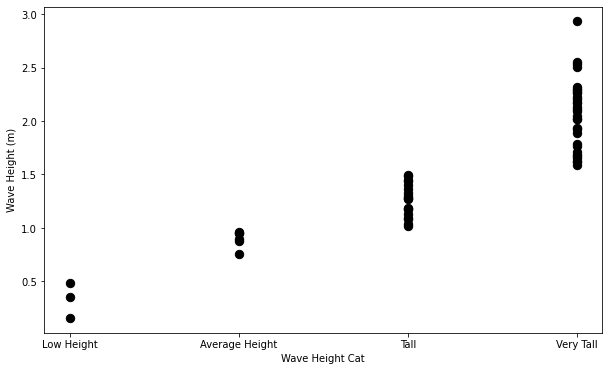

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# ScatterPlot: Find the scatterplot of wave height and wave Height Cat.
print('This scatterplot shows the distirbution of wave height and wave height categories')
print('As you can see from the plot the waves were')
print('evenly distirbuted among their specific height ranges')
df.plot(kind='scatter',x='Wave Height Cat',y='Wave Height (m)',figsize=(10,6),s=70,c='k')

THere is a strong linear relationship between Wave Height (m) and Avg. Wave PEriod (s)


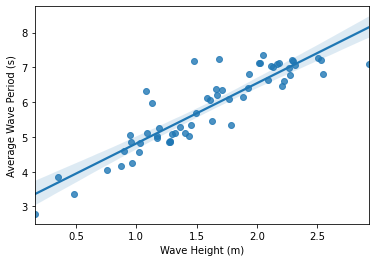

In [214]:
#Let's use a scatterplot to show a linear regression between Wave Height (m) and Avg. Wave Period (s)

print("THere is a strong linear relationship between Wave Height (m) and Avg. Wave PEriod (s)")
sns.regplot(x='Wave Height (m)', y= 'Average Wave Period (s)', data=df)
#results in a strong linear relationship




Consider a boxplot to examine the distribution of:
Wind Speed (m/s) between waves of different Height Categories

As you can see the Very Tall Waves have the greatest number of occurrences
and have the most distirbution amongs the increased wind speed



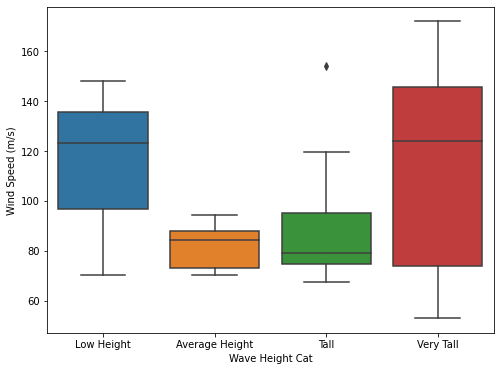

In [215]:
#Box plot

print("Consider a boxplot to examine the distribution of:")
print('Wind Speed (m/s) between waves of different Height Categories')
print()

plt.figure(figsize=(8,6))
sns.boxplot(x='Wave Height Cat', y='Wind Speed (m/s)', data=df)

print('As you can see the Very Tall Waves have the greatest number of occurrences')
print("and have the most distirbution amongs the increased wind speed")
print()

In [216]:
# Map
# Use FOlium to create a map of all the stations
# based on their longitude and latitude values
# center the world map around NYS and a for-loop was used

In [217]:
import folium  
map = folium.Map(location=[df['Latitude'], df['Longitude']], zoom_start=7, tiles='Stamen Terrain')   # 'Stamen Toner', 'Stamen Terrain', 'Mapbox Bright'
latitude = 43.2994
longitude = -74.2179
# define the world map centered around NYS with a zoom level of 7
nys_map = folium.Map(location=[latitude, longitude], zoom_start=7, tiles='OpenStreetMap')   # 'Stamen Terrain', 'Stamen Toner', or 'OpenStreetMap'

# display world map
nys_map

In [218]:
nysev_map = folium.Map(location=[latitude, longitude], zoom_start=2, tiles='Stamen Terrain')   # 'Stamen Toner', 'Stamen Terrain', 'Mapbox Bright'

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, label in zip(df['Longitude'], df['Latitude'], df['Wave Height Cat'],):
        folium.CircleMarker(location=([lat, lng]),
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=label
        ).add_to(nysev_map)

# add incidents to map
nysev_map

In [219]:
# There was an issue with this map, I was unable to label the pop-ups with Station_Names
# the error was: AttributeError: 'int' object has no attribute 'get_name' 
# The popup is instead labeled with the Wave Height Cat.

# Grouping

In [220]:
#Consider breaking the dataset into groups to analyze them separately
# Use Grouping to find the median Wind Speed (m/s), 
# median Wave Height (m), and median Sea LEvel Pressure (hPa)
# for different wave height categories

df2=df[['Wind Speed (m/s)','Wave Height (m)','Sea Level Pressure (hPa)','Wave Height Cat']]
df2.head()

,Wind Speed (m/s),Wave Height (m),Sea Level Pressure (hPa),Wave Height Cat
0,148.263000,0.158126,1012.816,Low Height
1,123.165001,0.355898,1016.601,Low Height
2,70.185997,0.488449,1016.480,Low Height
3,87.551003,0.759479,1017.830,Average Height
4,94.413002,0.878027,1017.126,Average Height


In [221]:
df2.groupby(['Wind Speed (m/s)'],as_index=False).median()
df2.groupby(['Wave Height (m)'],as_index=False).median()
df2.groupby(['Sea Level Pressure (hPa)'],as_index=False).median()
df2.groupby(['Wave Height Cat'],as_index=False).median()

,Wave Height Cat,Wind Speed (m/s),Wave Height (m),Sea Level Pressure (hPa)
0,Average Height,84.209503,0.922692,1017.306
1,Low Height,123.165001,0.355898,1016.480
2,Tall,79.098999,1.280801,1016.041
3,Very Tall,123.973999,2.092831,1015.944


In [222]:
print('This grouping provides a nice picture of what the median values are and helps with')
print('clarifying the analysis')
print('THe sea level pressure is pretty similiar regardless of wave height')
print('Whats intersting is that the Very Tall and Low Height median wind speed is 123 m/s')

This grouping provides a nice picture of what the median values are and helps with
clarifying the analysis
THe sea level pressure is pretty similiar regardless of wave height
Whats intersting is that the Very Tall and Low Height median wind speed is 123 m/s


# Correlation Analysis

In [223]:
# This section will determine if there is a correlation 
# between different variables

In [224]:
# use .corr to compute pairwise correlation of columns
df.corr()

#next we compute the p-value to determine if findings are statsitcaly significant 

,Latitude,Longitude,Wind Direction,Wind Speed (m/s),Wave Height (m),Dominant Wave Period (s),Average Wave Period (s),Wave Dir.,Sea Level Pressure (hPa),Air Temperature (C),Sea Surface Temperature (C),Dewpoint Temperature (C),Energy Flux (kW/m)
Latitude,1.000000,-0.451104,-0.206931,-1.000000,-0.506975,-0.473949,-0.472914,-0.532915,0.504493,0.446958,0.459931,0.423994,-0.646945
Longitude,-0.451104,1.000000,0.521498,0.451104,0.033935,0.046572,0.008618,0.437781,-0.465574,-0.897412,-0.889910,-0.887710,0.158602
Wind Direction,-0.206931,0.521498,1.000000,0.206931,0.144665,0.414459,0.292795,0.791077,-0.019956,-0.661350,-0.652001,-0.638475,0.217953
Wind Speed (m/s),-1.000000,0.451104,0.206931,1.000000,0.506975,0.473949,0.472914,0.532915,-0.504493,-0.446958,-0.459931,-0.423994,0.646945
Wave Height (m),-0.506975,0.033935,0.144665,0.506975,1.000000,0.800889,0.899617,0.439175,-0.203314,-0.082885,-0.107149,-0.055480,0.959027
Dominant Wave Period (s),-0.473949,0.046572,0.414459,0.473949,0.800889,1.000000,0.967446,0.657982,-0.060173,-0.160942,-0.194250,-0.131862,0.763677
Average Wave Period (s),-0.472914,0.008618,0.292795,0.472914,0.899617,0.967446,1.000000,0.591626,-0.063371,-0.091263,-0.125403,-0.065312,0.853423
Wave Dir.,-0.532915,0.437781,0.791077,0.532915,0.439175,0.657982,0.591626,1.000000,-0.049826,-0.602511,-0.614909,-0.569382,0.524288
Sea Level Pressure (hPa),0.504493,-0.465574,-0.019956,-0.504493,-0.203314,-0.060173,-0.063371,-0.049826,1.000000,0.412990,0.416483,0.378493,-0.229298
Air Temperature (C),0.446958,-0.897412,-0.661350,-0.446958,-0.082885,-0.160942,-0.091263,-0.602511,0.412990,1.000000,0.985802,0.981372,-0.222715


In [225]:
from scipy import stats
print ('Recall the following regarding P values')
print('if p < 0.01: we are 99% confidence that the finding is accurate,')
print ('if p < 0.05: we are 95% confidence that the finding is accurate')
print ('if p < 0.1 : we are 90% confidence that the finding is accurate...and so forth')
print ()
pearson_coef, p_value = stats.pearsonr(df['Wave Height (m)'], df['Wind Speed (m/s)'])
print("The Pearson Correlation Coefficient is", pearson_coef)
print (" with a P-value of P =", p_value)
print ()

print('Since the p-value is < 0.001,')
print('we are nearly 100% confident that')
print('there is strong positive relationship between Wave Height and Wind Speed')


Recall the following regarding P values
if p < 0.01: we are 99% confidence that the finding is accurate,
if p < 0.05: we are 95% confidence that the finding is accurate
if p < 0.1 : we are 90% confidence that the finding is accurate...and so forth

The Pearson Correlation Coefficient is 0.5069753039265177
 with a P-value of P = 4.175277023329067e-05

Since the p-value is < 0.001,
we are nearly 100% confident that
there is strong positive relationship between Wave Height and Wind Speed


In [226]:
pearson_coef, p_value = stats.pearsonr(df['Wave Height (m)'], df['Wind Direction'])
print("The Pearson Correlation Coefficient is", pearson_coef)
print (" with a P-value of P =", p_value)
print ()

print('Since the p-value is < 0.2,')
print('we are nearly 85% confident that')
print('there is strong positive relationship between Wave Height and Wind Direction')


The Pearson Correlation Coefficient is 0.14466479865530507
 with a P-value of P = 0.27431523484524656

Since the p-value is < 0.2,
we are nearly 85% confident that
there is strong positive relationship between Wave Height and Wind Direction


In [227]:
pearson_coef, p_value = stats.pearsonr(df['Wave Height (m)'], df['Sea Level Pressure (hPa)'])
print("The Pearson Correlation Coefficient is", pearson_coef)
print (" with a P-value of P =", p_value)
print ()

print('Since the p-value is: 0.2 > p > 0.1,')
print('we are nearly 87% confident that')
print('there is strong positive relationship between Wave Height and Sea Level Pressure (hPa)')


The Pearson Correlation Coefficient is -0.20331440694356231
 with a P-value of P = 0.12247837329275232

Since the p-value is: 0.2 > p > 0.1,
we are nearly 87% confident that
there is strong positive relationship between Wave Height and Sea Level Pressure (hPa)
